<a href="https://colab.research.google.com/github/Rishav-hub/Auto-ViML/blob/main/03_AutoVIML_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation
```pip install git+https://github.com/AutoViML/Auto_ViML.git```

or 

```pip install autoviml```

In [1]:
!pip install autoviml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 33.9 MB/s 
     |████████████████████████████████| 175 kB 59.2 MB/s 
     |████████████████████████████████| 125 kB 65.4 MB/s 
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 268 kB 67.6 MB/s 
     |████████████████████████████████| 569 kB 74.8 MB/s 
     |████████████████████████████████| 192.9 MB 85 kB/s 
     |████████████████████████████████| 11.2 MB 63.9 MB/s 
     |████████████████████████████████| 930 kB 61.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=87be4fa5772720f7e5b24805965d74b2a1c5cb8ca25142891550ce77afd9b8d6
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstal

## Implementation with Auto-ViML

In [1]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


## Load Dataset

In [2]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'+'titanic.csv')
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


## Split the Dataset

In [3]:
num = int(0.9*df.shape[0])
train = df[:num]
print(train.shape)
test = df[num:]
print(test.shape)

(798, 8)
(89, 8)


## Initiating Auto ViML

- **train**: It should contain the location of your dataset or if you have loaded it in a dataframe then the name of the dataframe. In this article we have loaded it in a dataframe named ‘df’ so we will set is as ‘df’.
- **target**: It contains the name of the target variable. In our case, the target variable name is “TenYearCHD”.
- **test**: It contains the test dataset. We can also leave it blank like this “” if we do not have any test dataset so that it will split the train dataset int train and test.
- **sample_submission**: We will leave it empty so that it will automatically create submission in our local directory.
hyper_param: We will randomized search cv because it is 3X faster than Grid Search CV. We need to set this as “RS”.
- **feature_reduction**: We will set this as true so that it will take into consideration the most important predictor variable for model creation.
- **scoring_parameter**: You can give your own parameter for scoring or otherwise it will assume appropriate according to the model. We will use “Weighted-f1” here.
- **KMeans_featurizer**: This should be true for linear and False for XGboost or random classifier because it can lead to overfitting.
- **boosting_flag**: Used for boosting. Here we will keep it as False.
- **binning_flag**: By default, it is False and can be set to True when we want to convert the top numeric variables into binned variables.
- **add_poly**: We will set it as false.
- **stacking_flag**: By default it is False. If set to True, it will add an additional feature which is derived from predictions of another model. We will keep it as False.
- **Imbalanced_flag**: It will check data imbalance if set to TRUE and will remove data imbalance using SMOTING technique.
- **Verbose**: Generally used to print the steps that are performed. We will set it as 3.

==================== System Information ====================
System: Linux
Node Name: 43c7a102505e
Release: 5.4.188+
Version: #1 SMP Sun Apr 24 10:03:06 PDT 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 10.15GB
Used: 2.36GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (798, 8)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (89, 8)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['Survived']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:     489  ->   61.3%
           1:     309  ->   38.7%
    Target Survived is already numeric. No transformatio

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: Name
Shape of Train Data: 798 rows
    Shape of Test Data: 89 rows


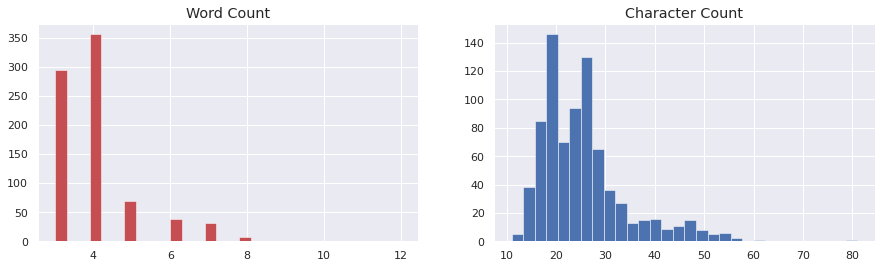

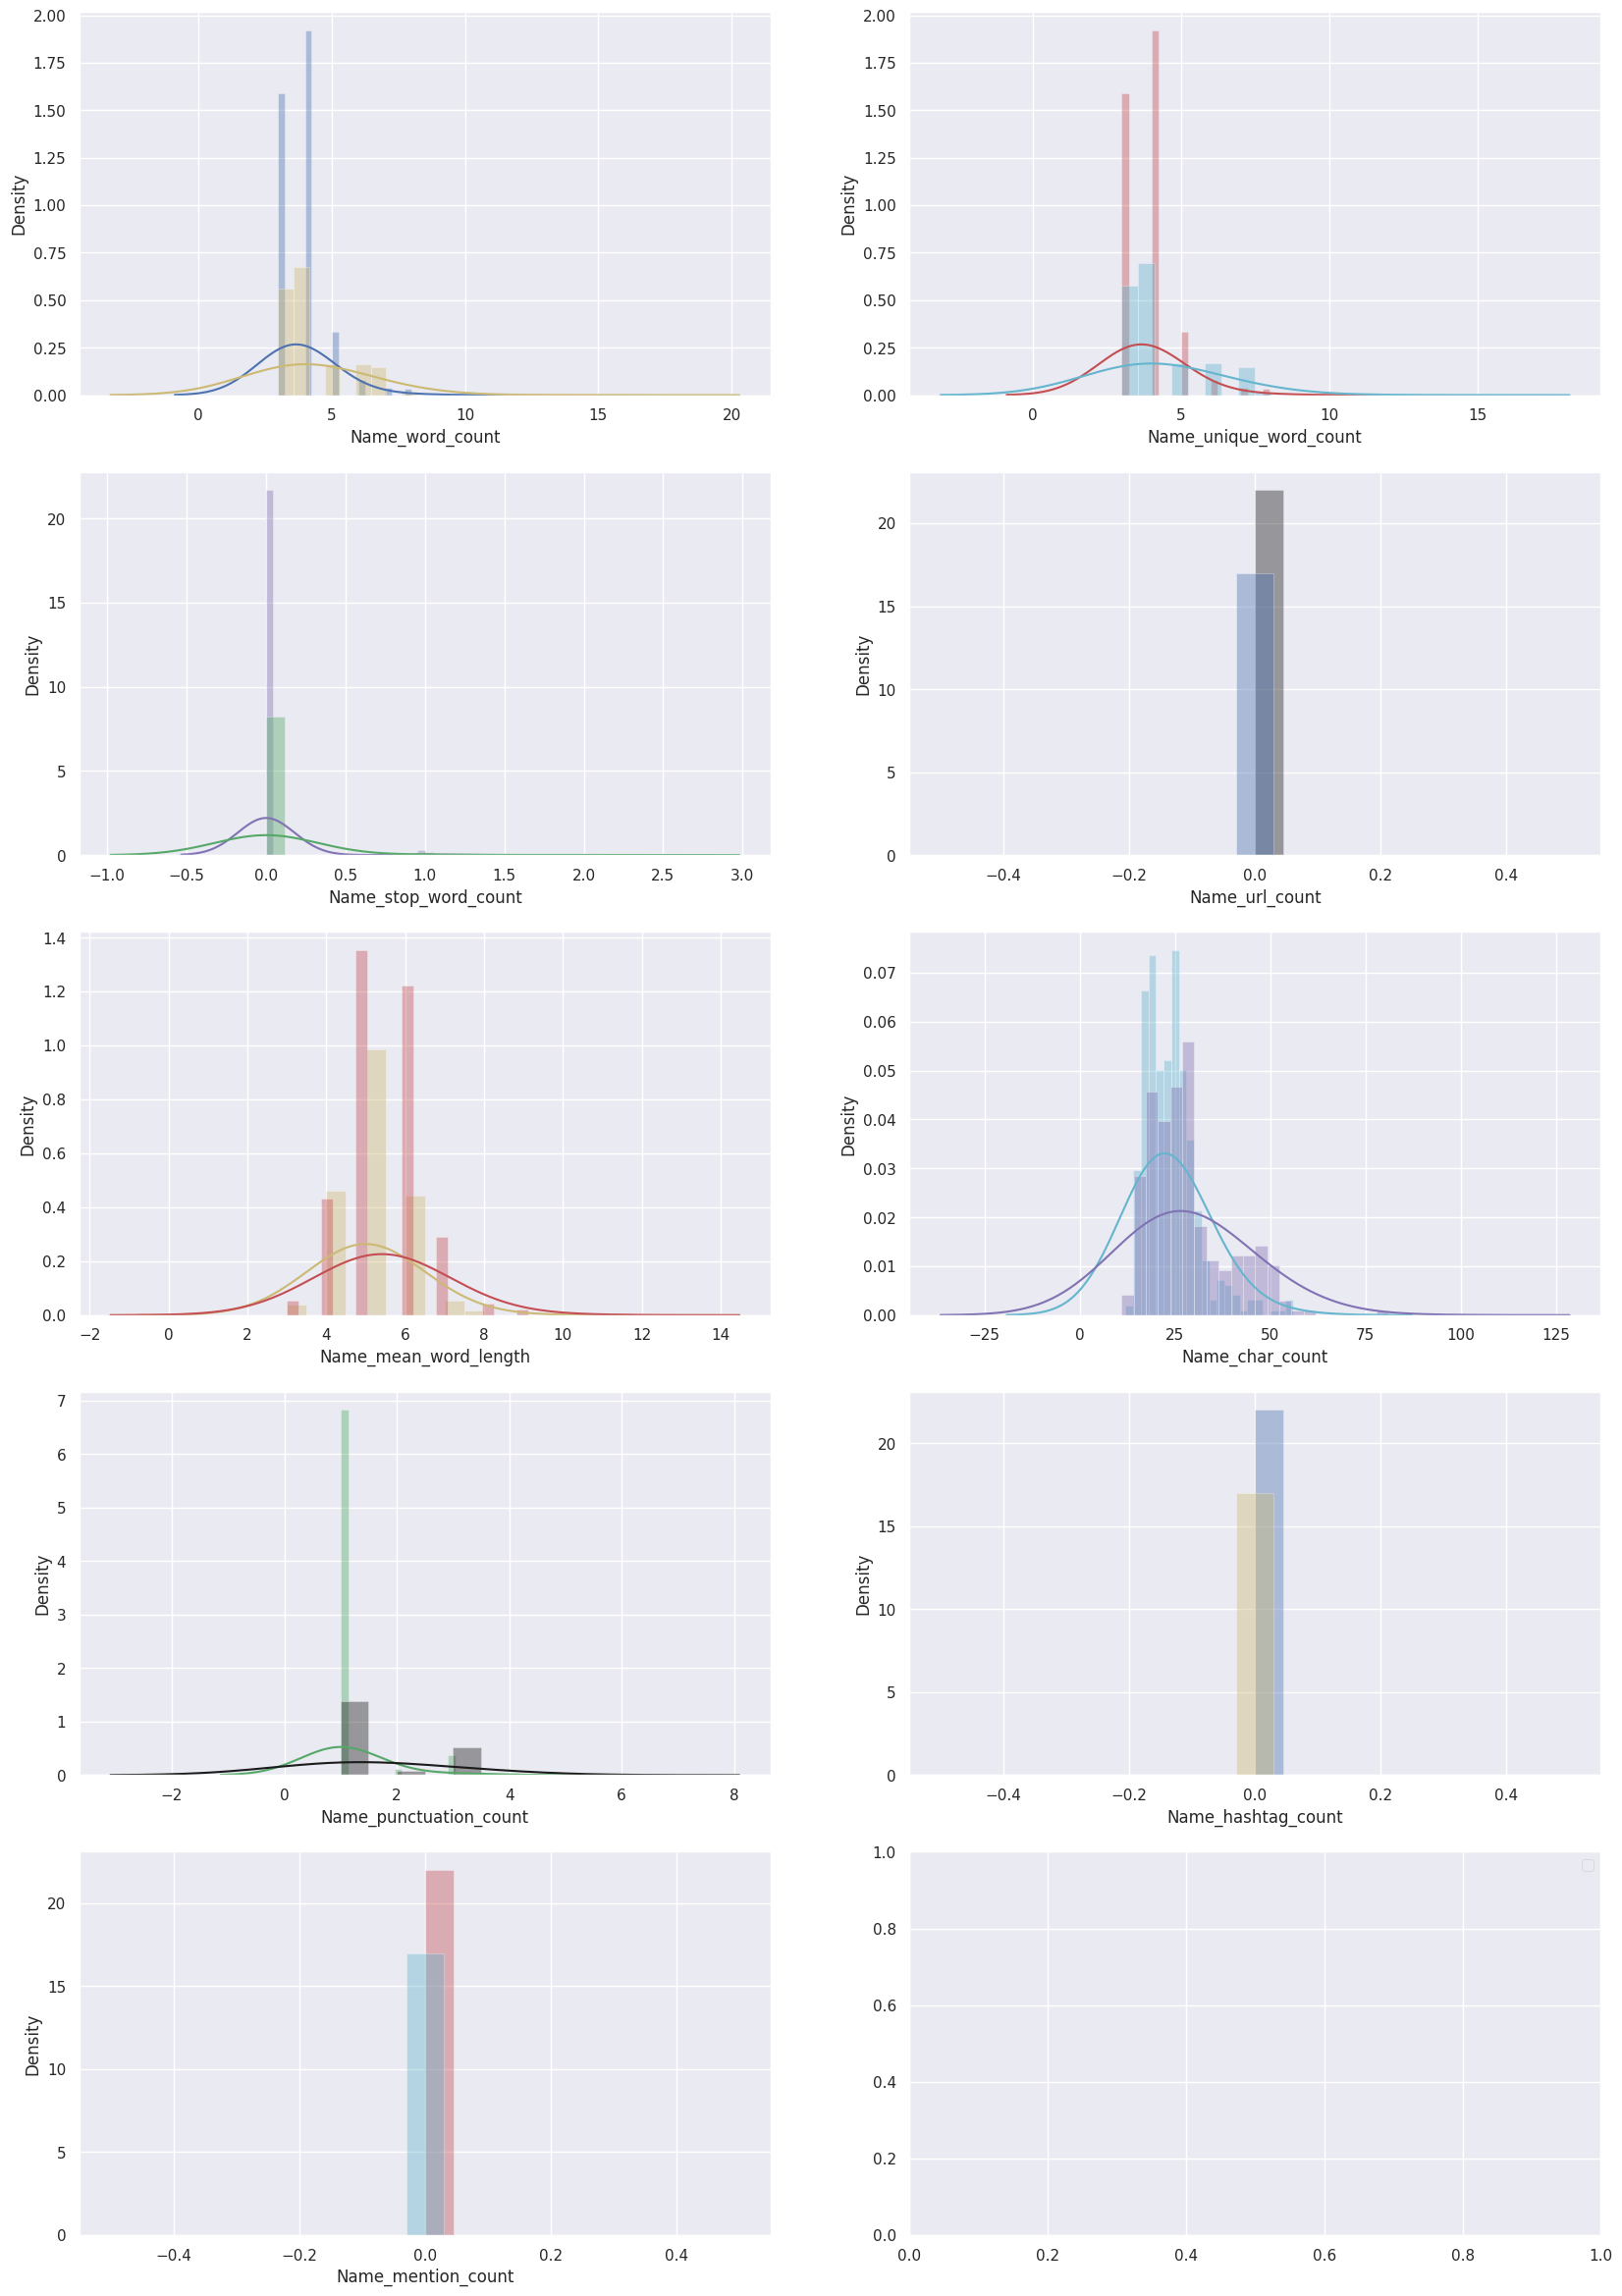

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 3 seconds
Train data Text cleaning completed. Time taken = 5 seconds

For target = Survived

    For class = 0
Top 200 n-grams
: ['miss', 'william', 'john', 'henry', 'james', 'george', 'charles', 'joseph', 'edward', 'thomas', 'master', 'johan', 'alfred', 'arthur', 'richard', 'samuel', 'david', 'frederick', 'martin', 'leonard', 'alexander', 'j', 'robert', 'peter', 'mary', 'daniel', 'francis', 'h', 'goodwin', 'ernest', 'panula', 'gustaf', 'andrew', 'skoog', 'sage', 'victor', 'williams', 'han', 'olsen', 'hansen', 'van', 'nil', 'andersson', 'lefebre', 'harry', 'ivan', 'patrick', 'stephen', 'maria', 'palsson', 'elia', 'dr', 'anna', 'jr', 'arnold', 'reginald', 'emil

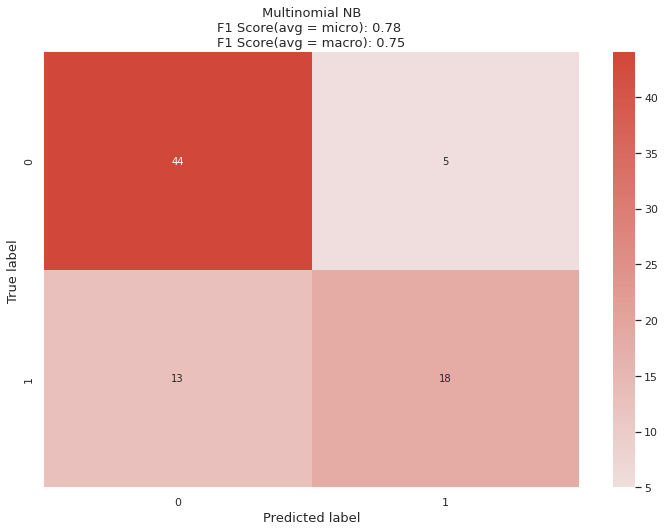

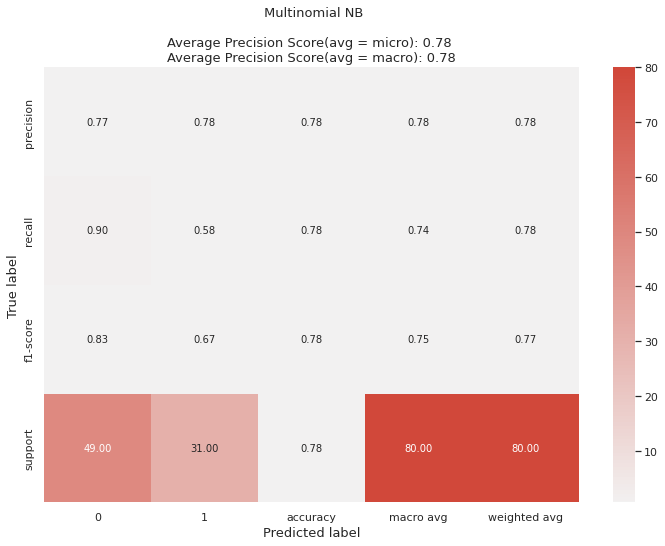

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 0 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 327 term-matrix to 18 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (798, 18)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (798, 18)
Reducing dimensions from 327 term-matrix to 18 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (89, 18)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (89, 18)
Creating word clusters using term matrix of

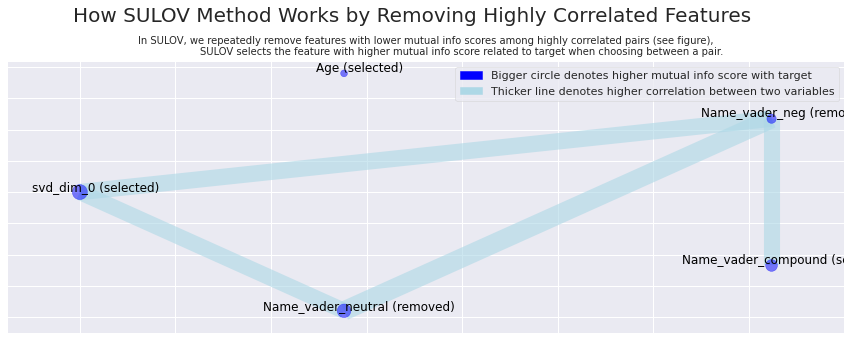

Splitting selected features into float and categorical (integer) variables:
    (22) float variables ...
    (15) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 37 
    Finding Important Features using Boosted Trees algorithm...
        using 37 variables...
        using 30 variables...
        using 23 variables...
        using 16 variables...
        using 9 variables...
        using 2 variables...
Found 19 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  718 , CV rows =  80
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in dat

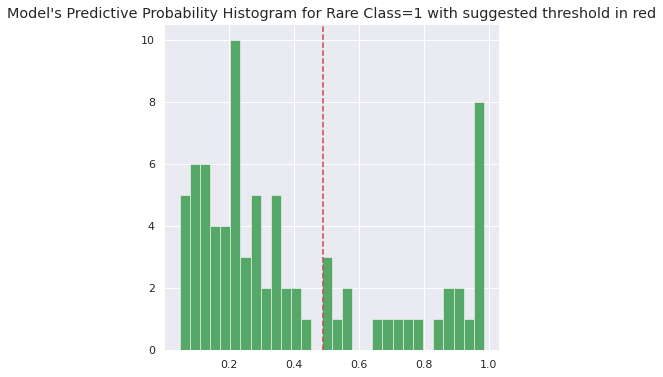

    Using threshold=0.5. However, 0.489 provides better F1=0.82 for rare class...
########################################################
SPE Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 86.2%
Balanced Accuracy = 81.83% with Threshold = 0.50
Confusion Matrix:
[[47  2]
 [10 21]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89        49
           1       0.91      0.68      0.78        31

    accuracy                           0.85        80
   macro avg       0.87      0.82      0.83        80
weighted avg       0.86      0.85      0.84        80

Balanced Accuracy = 85.06% with Threshold = 0.49
Confusion Matrix:
[[47  2]
 [ 8 23]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        49
           1       0.92      0.74      0.82        31

    accuracy                           0.88        80
   macro avg       0.89      0.85      0.86        80
w

Could not plot Cross Validation Parameters
    Time taken for this Target (in seconds) = 59
    Binning_Flag set to False or there are no float vars in data set to be binned
CAUTION: Stacking can produce Highly Overfit models on Training Data...
    Adding 2 Stacking feature(s) to training data
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
##################  Imbalanced Model Training  ############################
Using Self-Paced Ensemble Classifier to handle this Imbalanced dataset...
    This is not an Imbalanced data set. No need to use SMOTE but continuing...
    class_weights = [0.81595092 1.29126214]
    class_weighted_rows = {0: 489, 1: 399}
     Actual Training time taken in seconds = 20
Training of models completed. Now starting predictions on te

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 88
Writing Output files to disk...
    Saving predictions to ./Survived/Survived_Binary_Classification_test_modified.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_submission.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 1.5 for the Entire Process


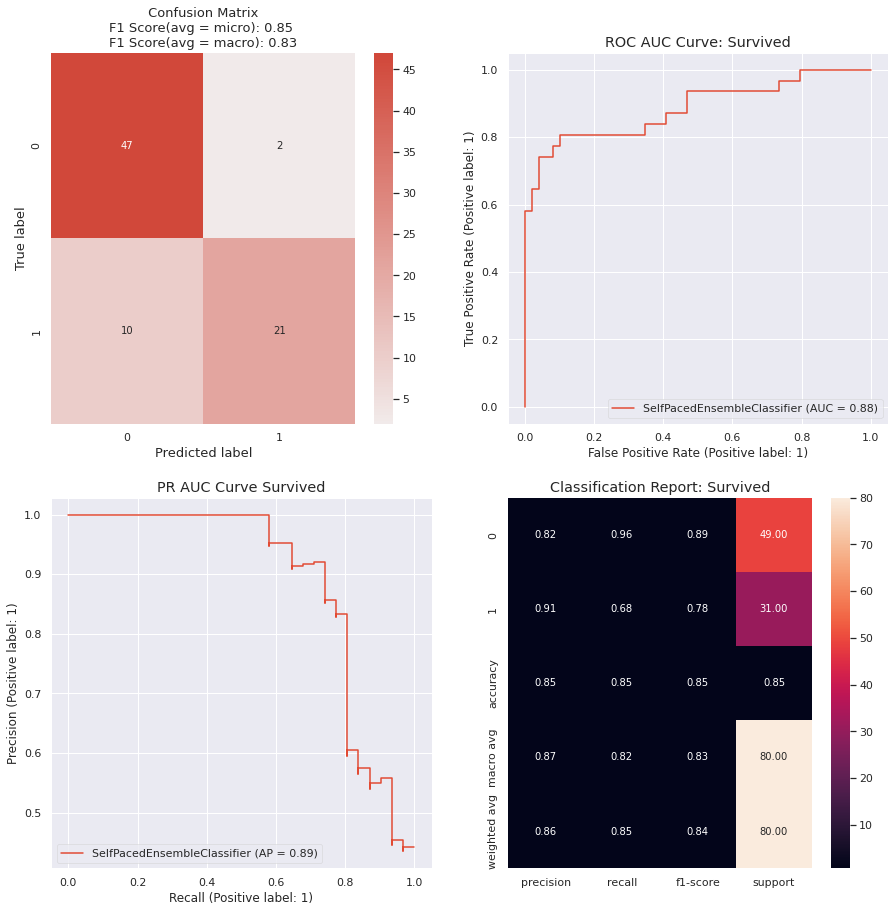

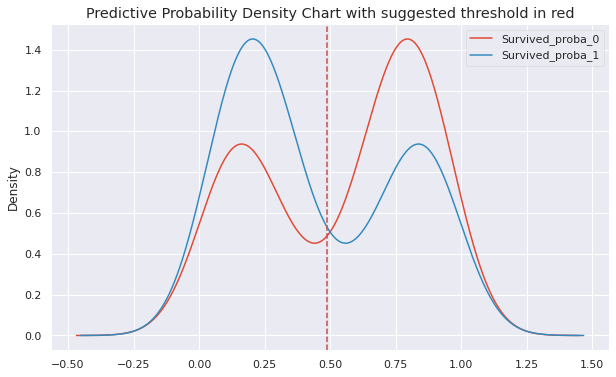

In [4]:
model, features, trainm, testm = Auto_ViML(
    train=train,
    target="Survived",
    test=test,
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="balanced-accuracy",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=True,
    Imbalanced_Flag=True,
    verbose=3
)

## With enabling Ensembling

set Stacking_Flag=False,
    Imbalanced_Flag=False

==================== System Information ====================
System: Linux
Node Name: 43c7a102505e
Release: 5.4.188+
Version: #1 SMP Sun Apr 24 10:03:06 PDT 2022
Machine: x86_64
Processor: x86_64
====================== CPU Information ======================
Physical cores: 1
Total cores: 2
==================== Memory Information ====================
Total: 12.68GB
Available: 9.62GB
Used: 3.56GB
================== System Information End ==================
##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (798, 8)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (89, 8)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['Survived']
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
           0:     489  ->   61.3%
           1:     309  ->   38.7%
    Target Survived is already numeric. No transformation

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Auto NLP processing on NLP Column: Name
Shape of Train Data: 798 rows
    Shape of Test Data: 89 rows


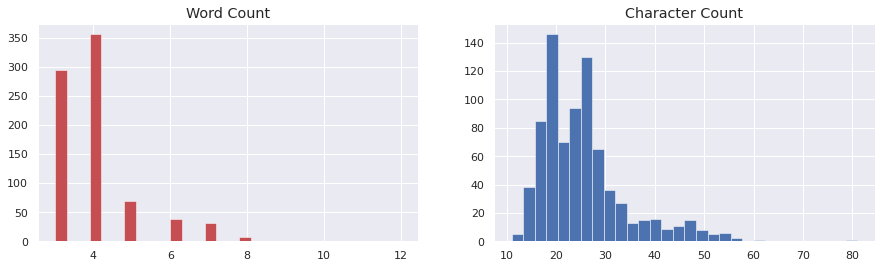

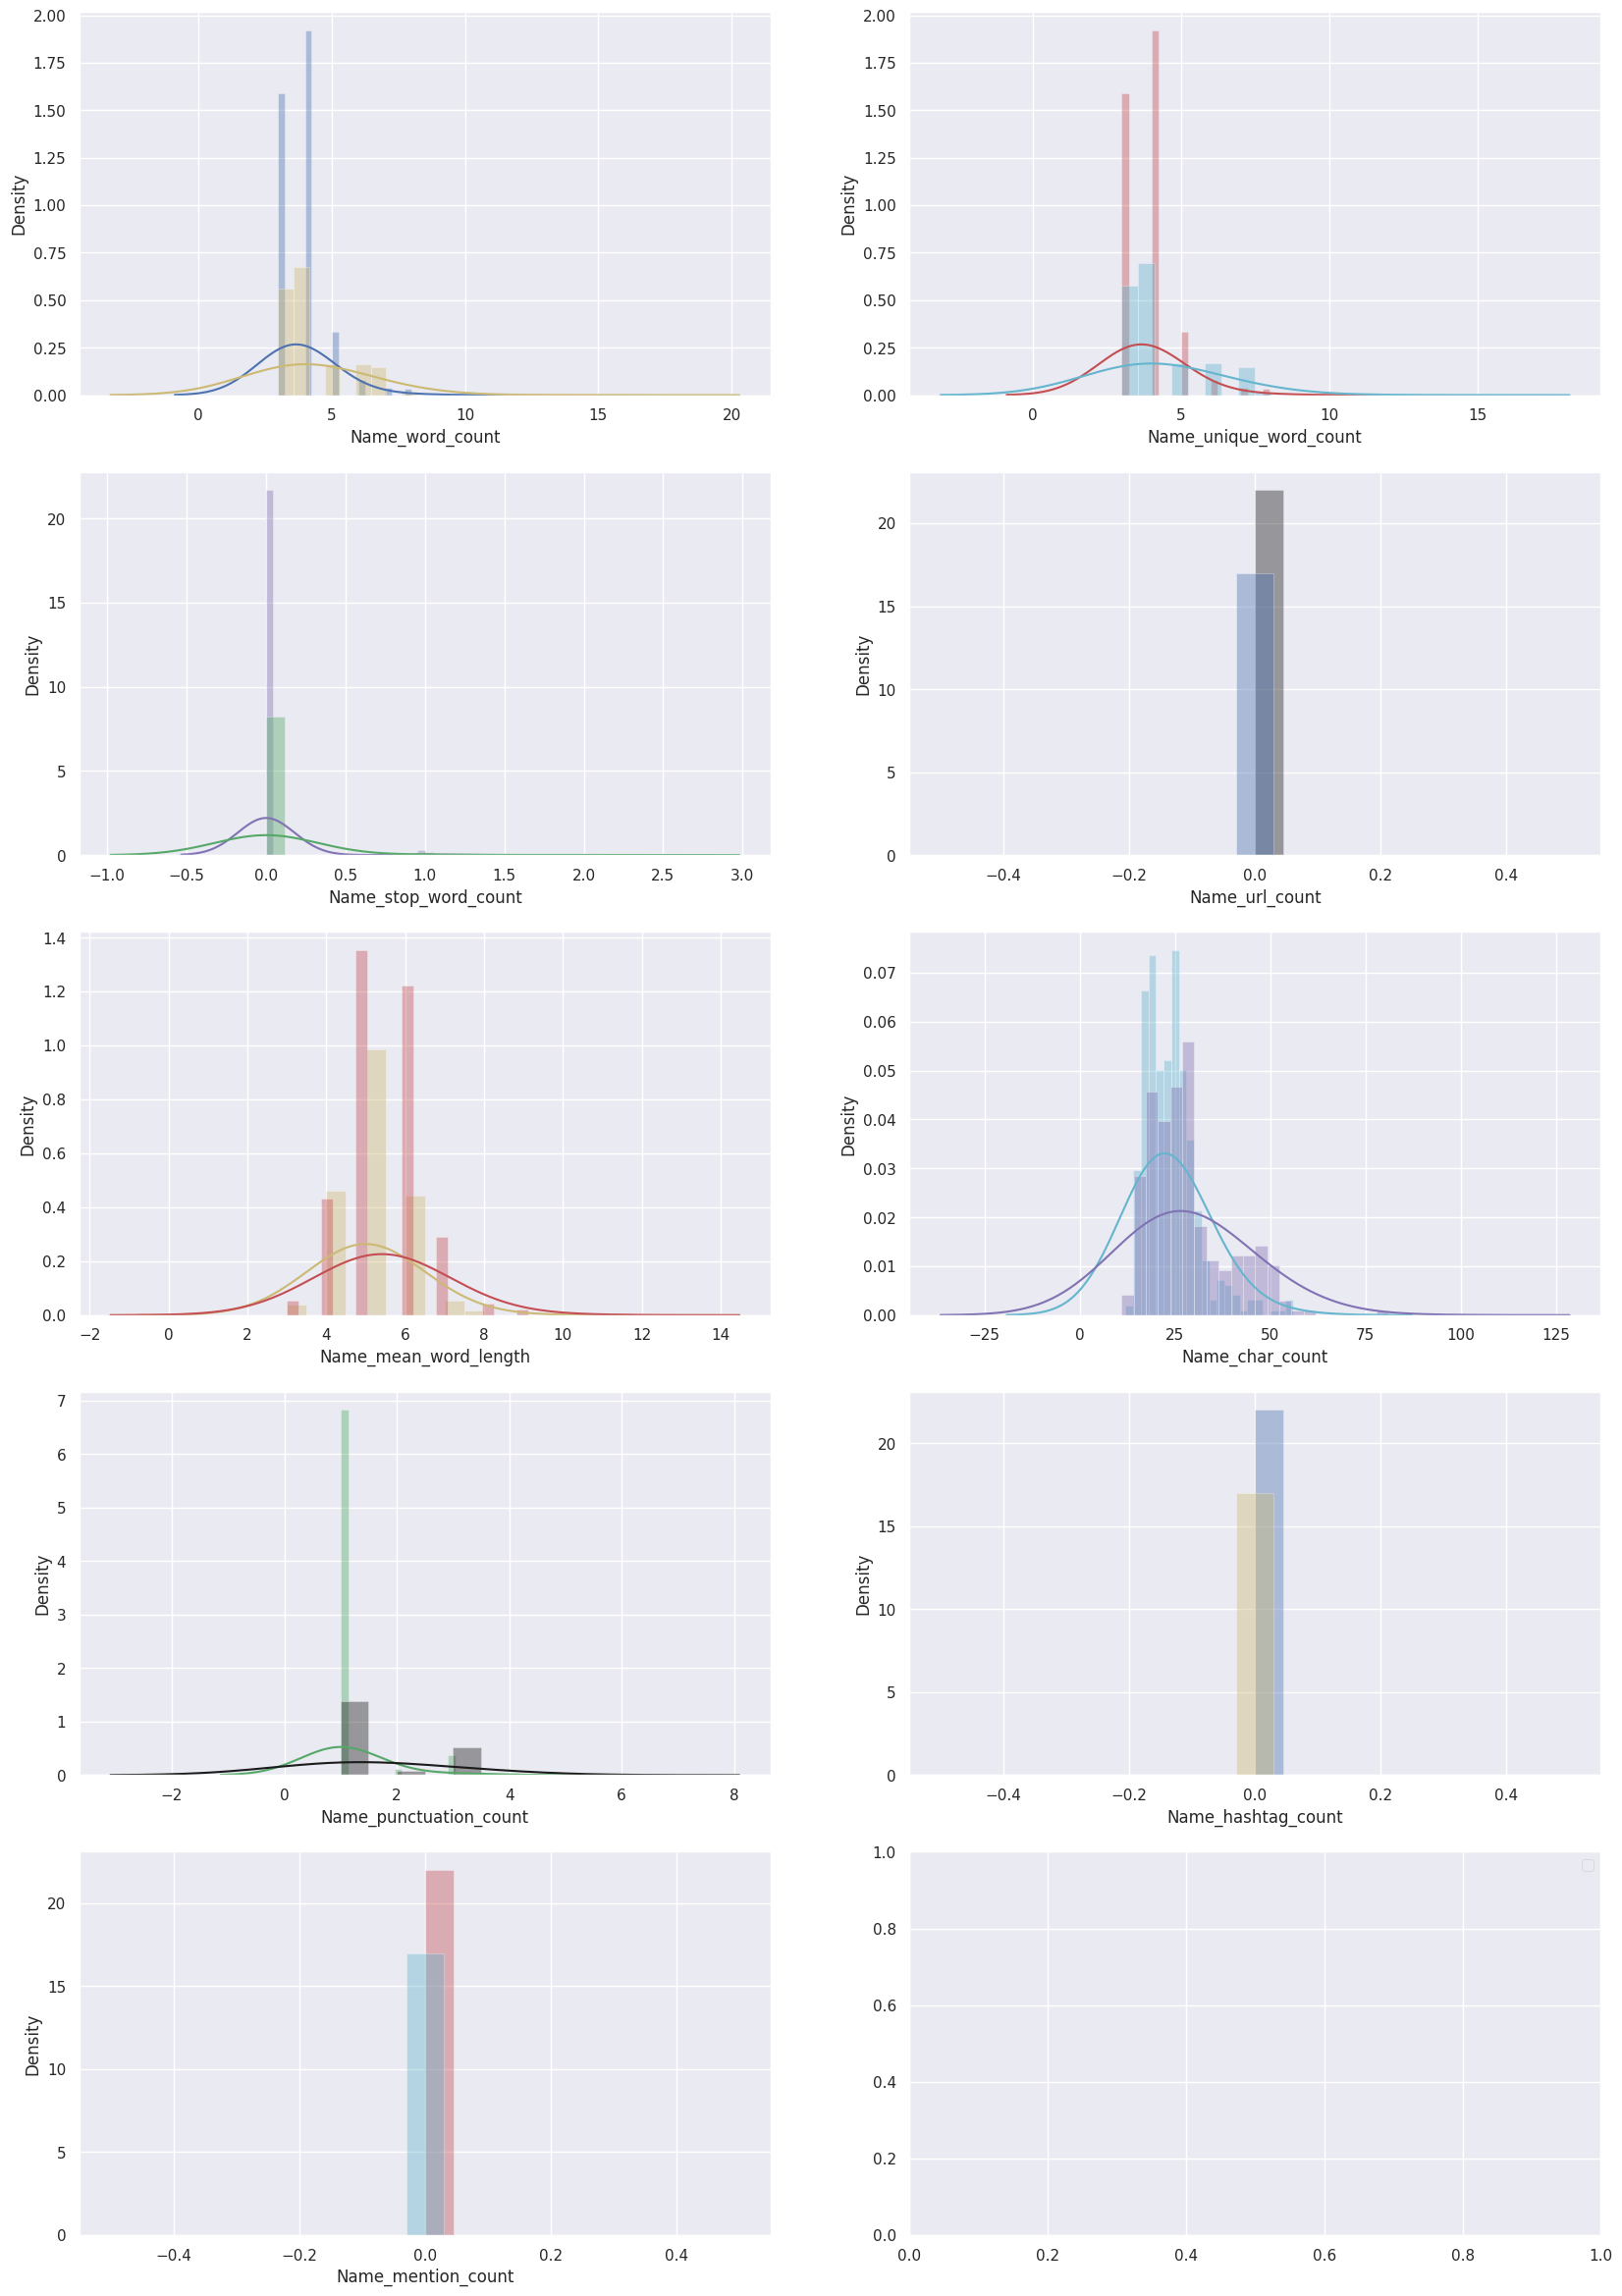

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for Name column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
Train data Text cleaning completed. Time taken = 5 seconds

For target = Survived

    For class = 0
Top 200 n-grams
: ['miss', 'william', 'john', 'henry', 'james', 'george', 'charles', 'joseph', 'edward', 'thomas', 'master', 'johan', 'alfred', 'arthur', 'richard', 'samuel', 'david', 'frederick', 'martin', 'leonard', 'alexander', 'j', 'robert', 'peter', 'mary', 'daniel', 'francis', 'h', 'goodwin', 'ernest', 'panula', 'gustaf', 'andrew', 'skoog', 'sage', 'victor', 'williams', 'han', 'olsen', 'hansen', 'van', 'nil', 'andersson', 'lefebre', 'harry', 'ivan', 'patrick', 'stephen', 'maria', 'palsson', 'elia', 'dr', 'anna', 'jr', 'arnold', 'reginald', 'emil

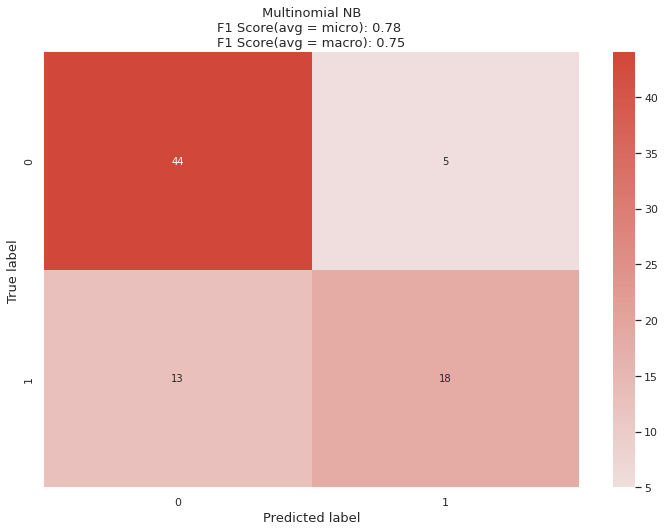

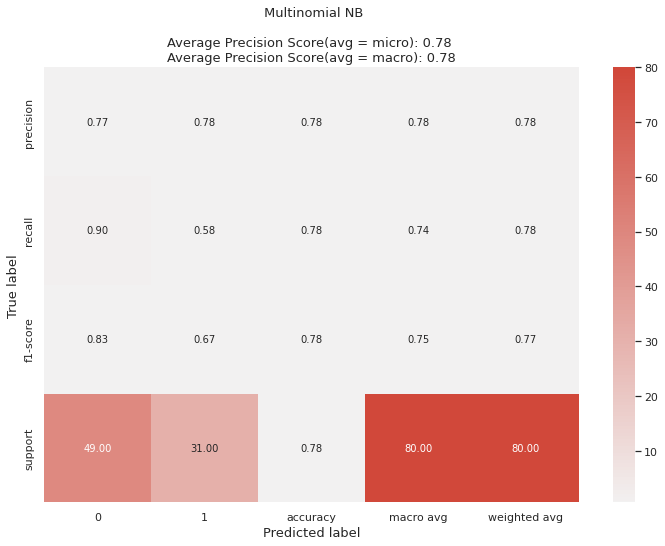

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 0 seconds
###    AFTER BEST NLP TRANSFORMER SELECTED, NOW ENRICH TEXT DATA  ##############
    Now transforming NLP_column for train and test data using best vectorizer...
Reducing dimensions from 327 term-matrix to 18 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (798, 18)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (798, 18)
Reducing dimensions from 327 term-matrix to 18 dimensions using TruncatedSVD...
    Reduced dimensional array shape to (89, 18)
    Time Taken for Truncated SVD = 0 seconds
TruncatedSVD Data Frame size = (89, 18)
Creating word clusters using term matrix of

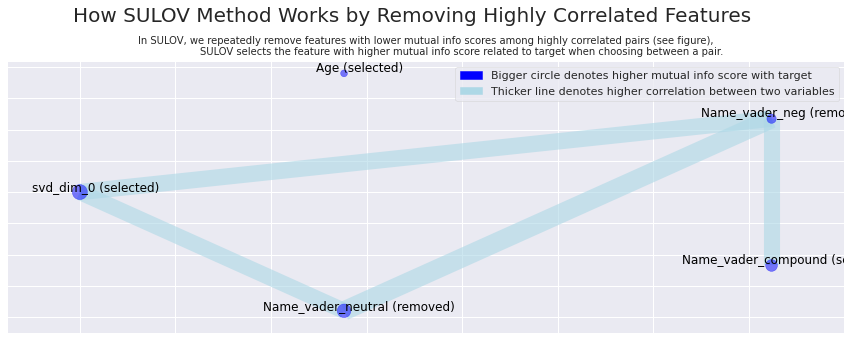

Splitting selected features into float and categorical (integer) variables:
    (22) float variables ...
    (15) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 37 
    Finding Important Features using Boosted Trees algorithm...
        using 37 variables...
        using 30 variables...
        using 23 variables...
        using 16 variables...
        using 9 variables...
        using 2 variables...
Found 19 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  718 , CV rows =  80
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in dat

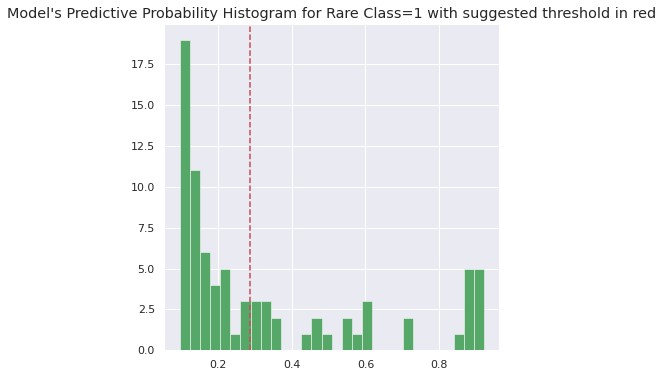

    Using threshold=0.5. However, 0.287 provides better F1=0.83 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 85.0%
Balanced Accuracy = 76.99% with Threshold = 0.50
Confusion Matrix:
[[47  2]
 [13 18]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        49
           1       0.90      0.58      0.71        31

    accuracy                           0.81        80
   macro avg       0.84      0.77      0.78        80
weighted avg       0.83      0.81      0.80        80

Balanced Accuracy = 85.81% with Threshold = 0.29
Confusion Matrix:
[[43  6]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.81      0.84      0.83        31

    accuracy                           0.86        80
   macro avg       0.85      0.86      0.86        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 82.5%
    Balanced Accuracy = 80.4%
    Precision         = 81.5%
    Average Precision = 82.3%
    Recall            = 71.0%
    F1 Score          = 75.9%
#####################################################
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        49
           1       0.81      0.71      0.76        31

    accuracy                           0.82        80
   macro avg       0.82      0.80      0.81        80
weighted avg       0.82      0.82      0.82        80

[[44  5]
 [ 9 22]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


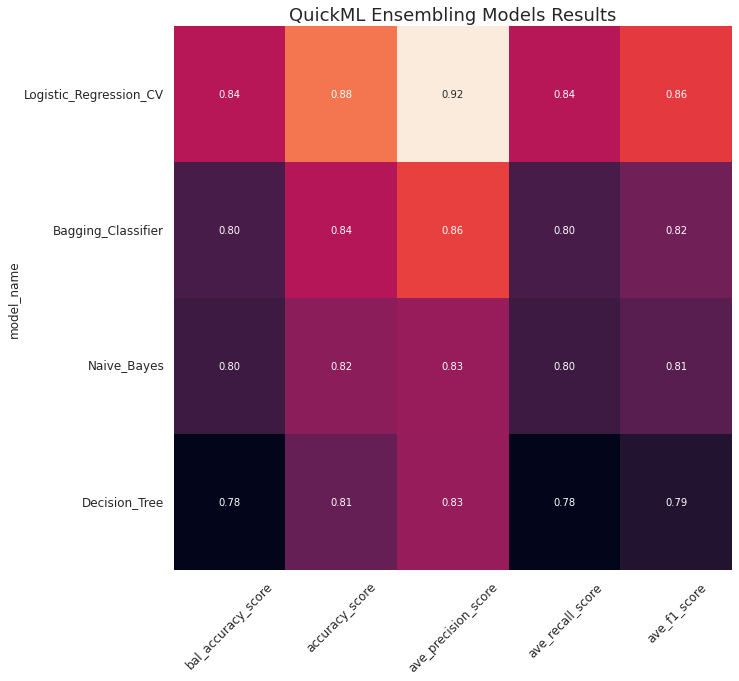

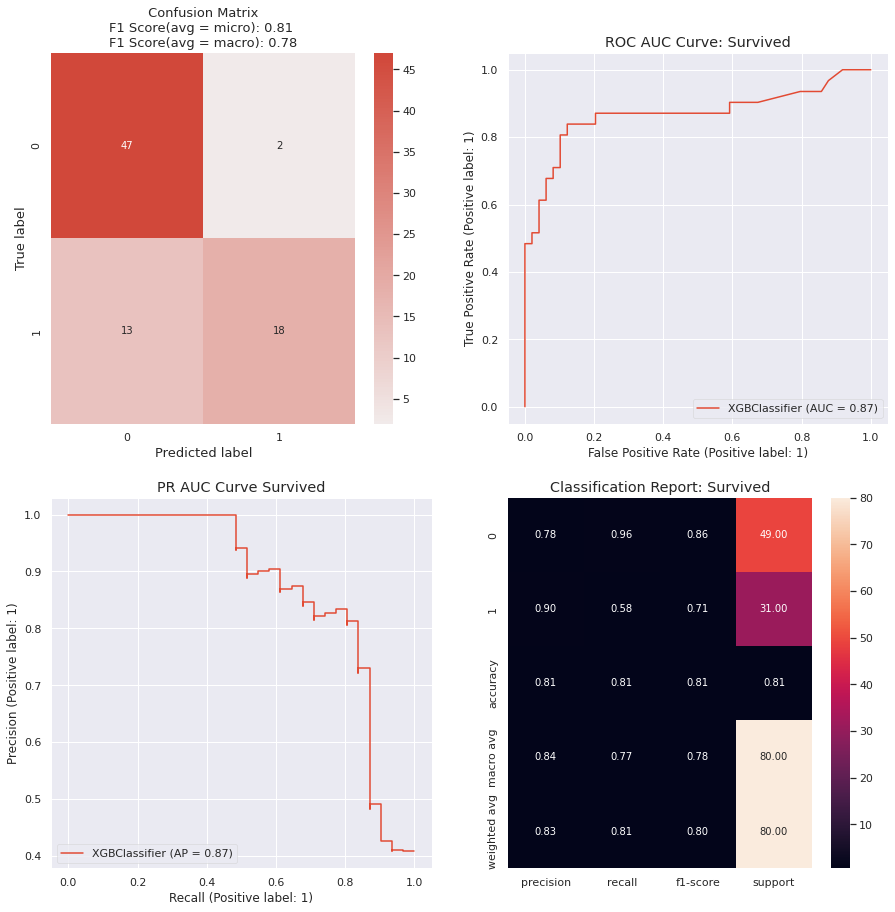

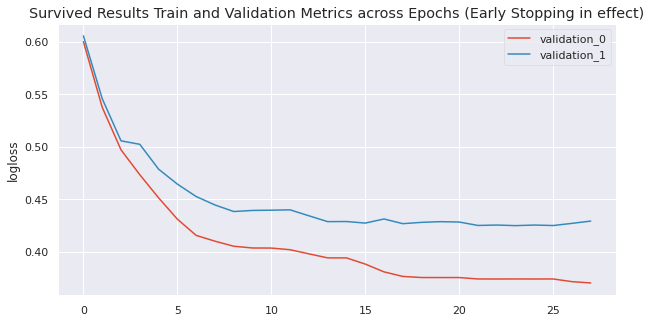

    Time taken for this Target (in seconds) = 46
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.287
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
Trying to plot SHAP values if SHAP is installed in this machine...


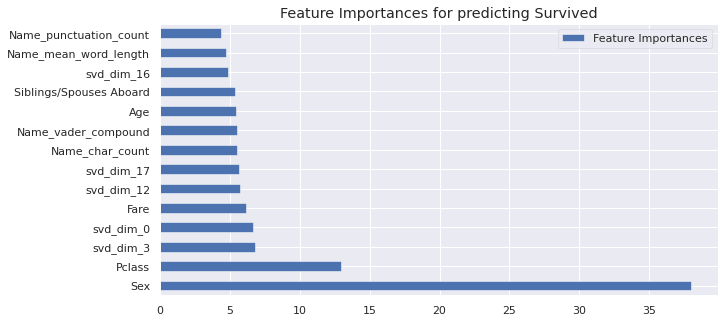

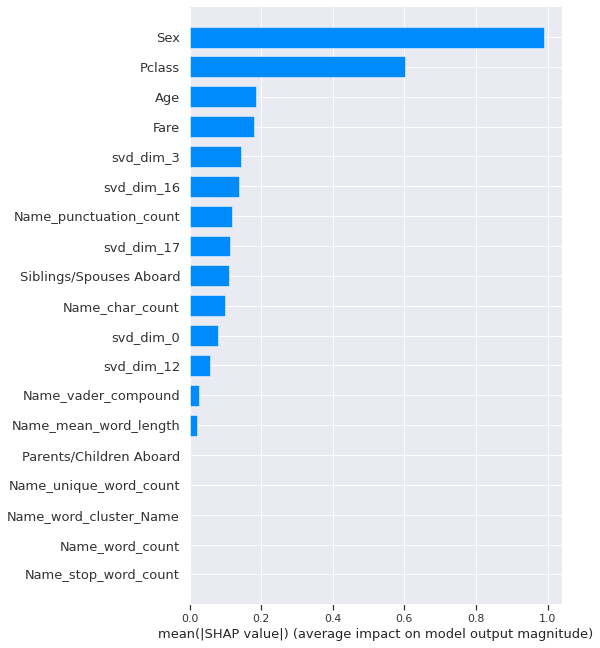

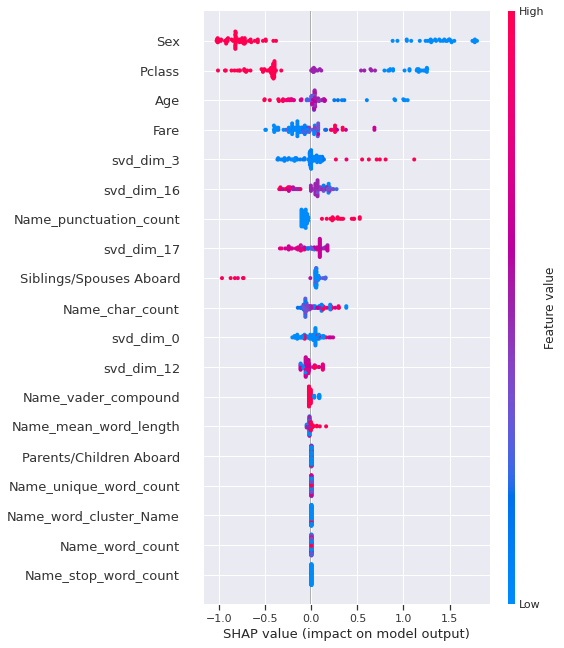

############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 49
Writing Output files to disk...
    Saving predictions to ./Survived/Survived_Binary_Classification_test_modified.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_submission.csv
    Saving predictions to ./Survived/Survived_Binary_Classification_train_modified.csv
###############  C O M P L E T E D  ################
Time Taken in mins = 0.8 for the Entire Process


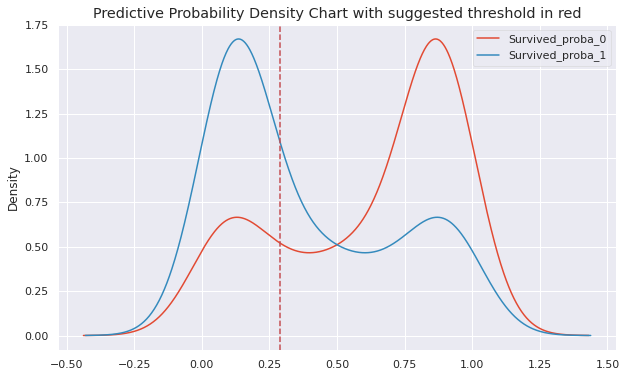

In [5]:
model_2, features_2, trainm_2, testm_2 = Auto_ViML(
    train=train,
    target="Survived",
    test=test,
    sample_submission="",
    hyper_param="RS",
    feature_reduction=True,
    scoring_parameter="balanced-accuracy",
    KMeans_Featurizer=False,
    Boosting_Flag=True,
    Binning_Flag=False,
    Add_Poly=False,
    Stacking_Flag=False,
    Imbalanced_Flag=False,
    verbose=3
)